In [1]:
%%time
# Import Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , precision_recall_curve , f1_score
from sklearn.metrics import classification_report , roc_auc_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from joblib import dump, load

CPU times: user 1.76 s, sys: 825 ms, total: 2.59 s
Wall time: 4.77 s


In [95]:
%%time
# Read csv file into dataframe
df = pd.read_csv('dfm.csv')
#df.info()

CPU times: user 13.4 ms, sys: 3.09 ms, total: 16.5 ms
Wall time: 16.6 ms


In [96]:
df.dropna(subset = ['Name_L'], inplace=True)
#df.set_index('Name_L')

In [97]:
df.rename(columns={'tennis y/n':'tennis_yn','School y/n':'School_yn','SameName y/n':'SameName_yn'}, inplace=True)
df.info()
df.tennis_yn = df.tennis_yn.astype(int)
df.School_yn = df.School_yn.astype(int)
df.SameName_yn = df.SameName_yn.astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 0 to 341
Data columns (total 34 columns):
LinkedIn_Manual    9 non-null object
EC_Review          271 non-null float64
Name_L             271 non-null object
LName              271 non-null object
Name_R             175 non-null object
Year               271 non-null int64
SearchResult       271 non-null object
School             271 non-null object
Activites          271 non-null object
Criteria           271 non-null object
YearsPlayed        271 non-null int64
RosterLink         70 non-null object
Hometown           175 non-null object
HS                 173 non-null object
ClassYear          175 non-null object
College            271 non-null object
First              271 non-null object
Last               271 non-null object
MidInit            70 non-null object
MidName            3 non-null object
RosterYear         175 non-null object
Headline           271 non-null object
Location           271 non-null object
Compa

In [99]:
df.set_index('Name_L', inplace=True)

In [100]:
df = df.select_dtypes(exclude=['object'])

In [74]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [102]:
df.head()

,EC_Review,Year,YearsPlayed,fuzz_ratio,fuzz_pratio,fuzz_tokensort,fuzz_tokenset,fuzz_wratio,tennis_yn,School_yn,SameName_yn,Decade
Name_L,,,,,,,,,,,,
Rohan Sikka,1.00,2020,4,100.00,100.00,100.00,100.00,100.00,0,1,1,2020
Konstantin Kirovski,1.00,2020,2,100.00,100.00,100.00,100.00,100.00,0,1,1,2020
Alafia Ayeni,1.00,2020,3,100.00,100.00,100.00,100.00,100.00,1,1,1,2020
Pietro Rimondini,1.00,2020,4,100.00,100.00,100.00,100.00,100.00,0,1,1,2020
Christopher Levine,0.00,2020,1,73.00,67.00,80.00,80.00,86.00,0,1,0,2020


In [103]:
# Define X with selected columns, y as the binary variable to predict
X = df.drop(['EC_Review'] , axis = 1 ).values
y = df['EC_Review'].values

In [134]:
# Train, Test, Split to segregate Training from Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42)

In [135]:
%%time
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('rfc', RandomForestClassifier(n_estimators=10))
         ]

pipeline = Pipeline(steps)

# Create the hyperparameter grid
#c_space = np.logspace(-5, 8, 15)
param_grid = {'rfc__max_depth': [30],
                'rfc__class_weight': [None],
                 'rfc__criterion' : ['entropy']}


# Instantiate the GridSearchCV object: logreg_cv
rfc = GridSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(rfc.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(rfc.best_score_))


# Compute and print metrics
print (confusion_matrix(y_test , rfc_predict))
print ("Accuracy score: ", accuracy_score(y_test , rfc_predict))
print("F1 score: ", f1_score(y_test , rfc_predict))
print("Precision score: " , precision_score(y_test , rfc_predict))
print("Recall score: " , recall_score(y_test , rfc_predict))
print (classification_report(y_test , rfc_predict))
rfc

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tuned Logistic Regression Parameter: {'rfc__class_weight': None, 'rfc__criterion': 'entropy', 'rfc__max_depth': 30}
Tuned Logistic Regression Accuracy: 0.7777777777777778
[[71 13]
 [13 93]]
Accuracy score:  0.8631578947368421
F1 score:  0.8773584905660378
Precision score:  0.8773584905660378
Recall score:  0.8773584905660378
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        84
         1.0       0.88      0.88      0.88       106

    accuracy                           0.86       190
   macro avg       0.86      0.86      0.86       190
weighted avg       0.86      0.86      0.86       190

CPU times: user 60.3 ms, sys: 5.74 ms, total: 66.1 ms
Wall time: 189 ms


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('rfc',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                  

In [146]:
#fig, ax = plt.subplots( 1,1, figsize=(20,10))
df.corr()
#ax.set_title("Fraudent Records correlation")
#sns.heatmap(df.drop['Name_L'],  cmap="OrRd", annot=True, 1).corr()
#sns.heatmap(df.query('isFraud == 1').drop(['isFraud', 'isFlaggedFraud'],1).corr(),  cmap="OrRd", ax=ax[0], annot=True)



,EC_Review,Year,YearsPlayed,fuzz_ratio,fuzz_pratio,fuzz_tokensort,fuzz_tokenset,fuzz_wratio,tennis_yn,School_yn,SameName_yn,Decade
EC_Review,1.00,0.64,0.25,0.67,0.64,0.66,0.63,0.65,0.57,0.46,0.57,0.63
Year,0.64,1.00,0.35,0.49,0.47,0.50,0.47,0.49,0.42,0.32,0.48,0.99
YearsPlayed,0.25,0.35,1.00,0.20,0.19,0.20,0.18,0.18,0.19,0.13,0.26,0.35
fuzz_ratio,0.67,0.49,0.20,1.00,0.96,0.93,0.93,0.93,0.41,0.44,0.75,0.48
fuzz_pratio,0.64,0.47,0.19,0.96,1.00,0.90,0.92,0.93,0.38,0.39,0.78,0.46
fuzz_tokensort,0.66,0.50,0.20,0.93,0.90,1.00,0.97,0.96,0.39,0.42,0.72,0.50
fuzz_tokenset,0.63,0.47,0.18,0.93,0.92,0.97,1.00,0.99,0.36,0.38,0.67,0.46
fuzz_wratio,0.65,0.49,0.18,0.93,0.93,0.96,0.99,1.00,0.37,0.41,0.68,0.48
tennis_yn,0.57,0.42,0.19,0.41,0.38,0.39,0.36,0.37,1.00,0.32,0.37,0.40
School_yn,0.46,0.32,0.13,0.44,0.39,0.42,0.38,0.41,0.32,1.00,0.33,0.32


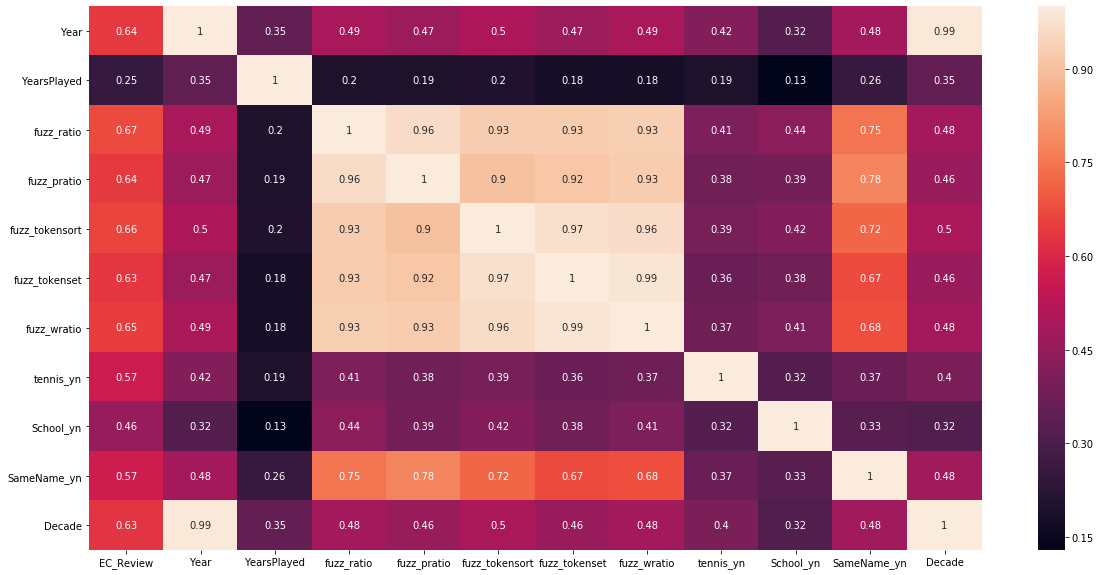

In [152]:
ax = plt.subplots(figsize=(20,10)) 
#corrMatrix = df.corr()
corrMatrix = df.corr().drop(['EC_Review', 'EC_Review'])
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [138]:
df_cols = df[:0]
df_cols = df_cols.drop(['EC_Review' ], axis = 1 )
for item1,item2 in sorted(zip(rfc.best_estimator_.named_steps['rfc'].feature_importances_,df_cols.columns),reverse=True):
    print(f'{item2} has a score of {item1}')

Year has a score of 0.23521395666867873
fuzz_wratio has a score of 0.1468790685769522
fuzz_tokenset has a score of 0.1094306062167785
Decade has a score of 0.10814326530108585
fuzz_ratio has a score of 0.10735345854955443
fuzz_pratio has a score of 0.10285638876350495
tennis_yn has a score of 0.06496802466700968
SameName_yn has a score of 0.04856797718519586
YearsPlayed has a score of 0.0438422246080531
fuzz_tokensort has a score of 0.0216721780896293
School_yn has a score of 0.011072851373557561


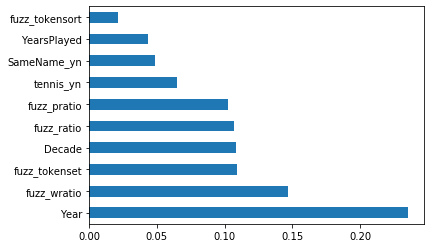

In [139]:
feat_importances = pd.Series(rfc.best_estimator_.named_steps['rfc'].feature_importances_, index=df_cols.columns)
#feat_importances.nlargest(4).plot(kind='barh')
#checking more than 4 because original omission of CASH_IN...should remove FlaggedFraud to see effect
feat_importances.nlargest(10).plot(kind='barh')

In [140]:
%%time
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('rfc', RandomForestClassifier(n_estimators=10))
         ]

pipeline = Pipeline(steps)

# Create the hyperparameter grid
#c_space = np.logspace(-5, 8, 15)
param_grid = {'rfc__max_depth': [30],
                'rfc__class_weight': [None],
                 'rfc__criterion' : ['entropy']}


# Instantiate the GridSearchCV object: logreg_cv
rfc = GridSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(rfc.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(rfc.best_score_))


# Compute and print metrics
print (confusion_matrix(y_test , rfc_predict))
print ("Accuracy score: ", accuracy_score(y_test , rfc_predict))
print("F1 score: ", f1_score(y_test , rfc_predict))
print("Precision score: " , precision_score(y_test , rfc_predict))
print("Recall score: " , recall_score(y_test , rfc_predict))
print (classification_report(y_test , rfc_predict))
rfc

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tuned Logistic Regression Parameter: {'rfc__class_weight': None, 'rfc__criterion': 'entropy', 'rfc__max_depth': 30}
Tuned Logistic Regression Accuracy: 0.7654320987654321
[[75  9]
 [17 89]]
Accuracy score:  0.8631578947368421
F1 score:  0.8725490196078433
Precision score:  0.9081632653061225
Recall score:  0.839622641509434
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85        84
         1.0       0.91      0.84      0.87       106

    accuracy                           0.86       190
   macro avg       0.86      0.87      0.86       190
weighted avg       0.87      0.86      0.86       190

CPU times: user 75.1 ms, sys: 6.08 ms, total: 81.2 ms
Wall time: 205 ms


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('rfc',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                  

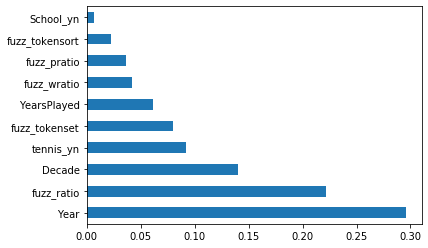

In [141]:
feat_importances = pd.Series(rfc.best_estimator_.named_steps['rfc'].feature_importances_, index=df_cols.columns)
#feat_importances.nlargest(4).plot(kind='barh')
#checking more than 4 because original omission of CASH_IN...should remove FlaggedFraud to see effect
feat_importances.nlargest(10).plot(kind='barh')